To Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading directory path
sample_filename = "drive/MyDrive/s8-ucek-assets/samplePic/sample.jpg"
facenet_path = "drive/MyDrive/s8-ucek-assets/facenet_keras.h5"
facenet_weight_path = "drive/MyDrive/s8-ucek-assets/facenet_keras_weights.h5"



In [ ]:
# to extract faces from an image
!pip install mtcnn

     |████████████████████████████████| 2.3MB 32.1MB/s 


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)
16 (160, 160, 3)
17 (160, 160, 3)
18 (160, 160, 3)
19 (160, 160, 3)
20 (160, 160, 3)
21 (160, 160, 3)
22 (160, 160, 3)
23 (160, 160, 3)
24 (160, 160, 3)
25 (160, 160, 3)
26 (160, 160, 3)
27 (160, 160, 3)
28 (160, 160, 3)
29 (160, 160, 3)
30 (160, 160, 3)
31 (160, 160, 3)
32 (160, 160, 3)
33 (160, 160, 3)
34 (160, 160, 3)
35 (160, 160, 3)
36 (160, 160, 3)
37 (160, 160, 3)
38 (160, 160, 3)
39 (160, 160, 3)
40 (160, 160, 3)
41 (160, 160, 3)
42 (160, 160, 3)
43 (160, 160, 3)
44 (160, 160, 3)
45 (160, 160, 3)
46 (160, 160, 3)
47 (160, 160, 3)
48 (160, 160, 3)
49 (160, 160, 3)
50 (160, 160, 3)
51 (160, 160, 3)
52 (160, 160, 3)
53 (160, 160, 3)
54 (160, 160, 3)
55 (160, 160, 3)
56 (160, 160, 3)
57 (160, 160, 3)
58 (160, 160, 3)
59 (160, 160, 3)
60 (16

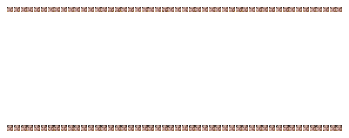

In [ ]:
# demonstrate face detection
import mtcnn
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify folder to plot
# folder = '5-celebrity-faces-dataset/train/ben_afflek/'
folder = "drive/MyDrive/s8-ucek-assets/data-teacher/train/meharu/"
# folder = "drive/MyDrive/s8-ucek-assets/samplePic/"
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 50, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)


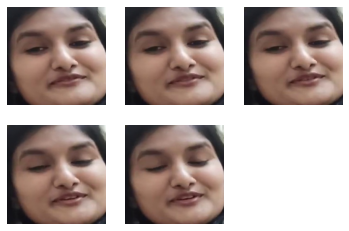

In [ ]:
# demonstrate face detection
import mtcnn
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify folder to plot
# folder = '5-celebrity-faces-dataset/train/ben_afflek/'
folder = "drive/MyDrive/s8-ucek-assets/face/"
# folder = "drive/MyDrive/s8-ucek-assets/samplePic/"
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 3, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [ ]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

train_data_folder = "drive/MyDrive/s8-ucek-assets/data-teacher/train/"
val_data_folder = "drive/MyDrive/s8-ucek-assets/data-teacher/val/"
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

# load train dataset
trainX, trainy = load_dataset(train_data_folder)
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset(val_data_folder)
# save arrays to one file in compressed format
savez_compressed('drive/MyDrive/s8-ucek-assets/teachers-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 100 examples for class: meharu
>loaded 100 examples for class: reshma
>loaded 100 examples for class: arun
>loaded 100 examples for class: sabeena
(400, 160, 160, 3) (400,)
>loaded 30 examples for class: meharu
>loaded 30 examples for class: arun
>loaded 30 examples for class: sabeena
>loaded 30 examples for class: reshma


In [ ]:
# calculate a face embedding for each face in the dataset using facenet
import tensorflow as tf
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('drive/MyDrive/s8-ucek-assets/teachers-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
print('Loading Model')
model = load_model('drive/MyDrive/s8-ucek-assets/facenet_keras.h5',compile=False)
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('drive/MyDrive/s8-ucek-assets/teachers-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (400, 160, 160, 3) (400,) (120, 160, 160, 3) (120,)
Loading Model
Loaded Model
Cause: could not parse the source code of <function <lambda> at 0x7f594a59b320>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f594a59b320>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f594a59b9e0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f594a59b9e0>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7f594a59bcb0>: no matching AST found
To silence this warni

Predicted: reshma (97.273)
Expected: reshma


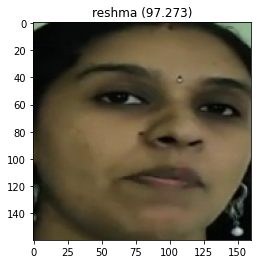

In [ ]:
# develop a classifier for the teachers
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('drive/MyDrive/s8-ucek-assets/teachers-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('drive/MyDrive/s8-ucek-assets/teachers-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()